## 합성곱 신경망의 시각화

### 가중치 시각화

- 합성곱 층은 여러 개의 필터를 사용해 이미지에서 특징을 학습

- 각 필터는 커널이라 부르는 가중치와 절편을 가지고 있다
- 일반적으로 절편은 시각적으로 의미가 있지 않음
- 가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 함

In [32]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7402 - loss: 0.7265

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.8121 - loss: 0.5277 - val_accuracy: 0.8764 - val_loss: 0.3329
Epoch 2/20
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8666 - loss: 0.3698

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.8725 - loss: 0.3524 - val_accuracy: 0.8924 - val_loss: 0.2928
Epoch 3/20
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8847 - loss: 0.3141

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.8900 - loss: 0.3042 - val_accuracy: 0.9013 - val_loss: 0.2650
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8987 - loss: 0.2770

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9020 - loss: 0.2701 - val_accuracy: 0.9080 - val_loss: 0.2537
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9071 - loss: 0.2555

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9091 - loss: 0.2496 - val_accuracy: 0.9134 - val_loss: 0.2373
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9129 - loss: 0.2339

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9160 - loss: 0.2277 - val_accuracy: 0.9162 - val_loss: 0.2357
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9218 - loss: 0.2106 - val_accuracy: 0.9161 - val_loss: 0.2416
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9270 - loss: 0.1939 - val_accuracy: 0.9158 - val_loss: 0.2432


In [37]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [38]:
model.layers

[<Conv2D name=conv2d_10, built=True>,
 <MaxPooling2D name=max_pooling2d_8, built=True>,
 <Conv2D name=conv2d_11, built=True>,
 <MaxPooling2D name=max_pooling2d_9, built=True>,
 <Flatten name=flatten_4, built=True>,
 <Dense name=dense_10, built=True>,
 <Dropout name=dropout_4, built=True>,
 <Dense name=dense_11, built=True>]

In [39]:
# 첫 번째 합성곱 층의 가중치 조사
# layers 속성의 첫 번째 원소를 선택해 weights의 첫 번째 원소(가중치)와 두 번째 원소(절편)의 크기 출력
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


- weights 속성은 텐서플로의 다차원 배열인 Tensor 클래스의 객체

- 다루기 쉽도록 numpy() 메서드를 사용해 넘파이 배열로 변환
- 그다음 가중치 배열의 평균과 표준편차를 넘파이 mean() 메서드와 std() 메서드로 계산

In [40]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.008244292 0.2232438


- 이 가중치의 평균값은 0에 가깝고 표준편차는 0.27

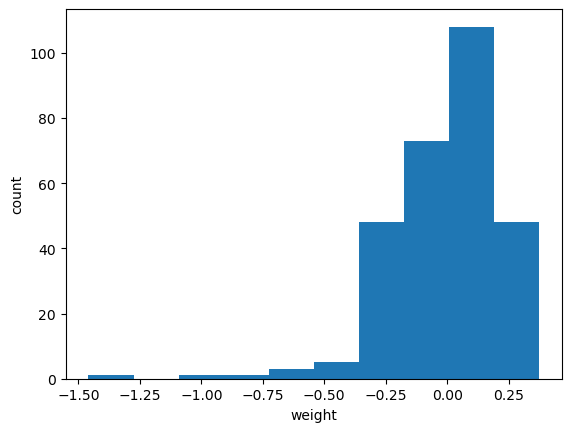

In [41]:
# 가중치가 어떤 분포를 가졌는지
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

- 맷플롯립의 hist() 함수는 히스토그램을 그리기 위해 1차원 배열로 전달해야 함

- 이를 위해 넘파이 reshape 메서드로 conv_weights 배열을 1개의 열이 있는 배열로 변환

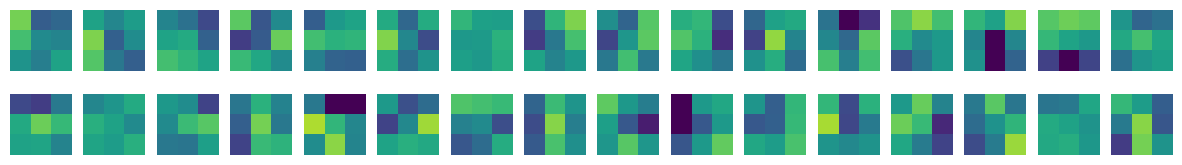

In [42]:
# 32개의 커널을 16개씩 두 줄에 출력
# subplots() 함수를 사용해 32개의 그래프 영역을 만들고 순서대로 커널 출력
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
        axs[i, j].axis('off')
plt.show()

- 앞에서 conv_weights에 32개의 가중ㅊ;를 저장

- 이 배열의 마지막 차원을 순회하면서 0부터 i * 16 + j번째까지의 가중치 값을 차례대로 출력
- i는 행 인덱스, j는 열 인덱스 > 0~1, 0~15까지의 범위

- imshow() 함수는 배열에 있는 최댓값과 최솟값을 사용해 픽셀의 강도를 표현

- 그 배열의 최댓값이면 가장 밝은 노란색으로 그림
- 만약 두 배열을 imshow() 함수로 비교하려면 이런 동장은 바람직하지x
- 어떤 절댓값으로 기준을 정해서 픽셀의 강도를 나타내야 비교하기 좋음
- 이를 위해 코드에서 vmin과 vmax로 맷플롯립의 컬러맵으로 표현할 범위를 지정

- 훈련하지 않은 빈 합겅곱 신경망 만들기

In [43]:
# Sequential 클래스로 모델을 만들고 Conv2D 층을 하나 추가
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
                                          'relu', padding='same', input_shape=(28, 28, 1)))

In [44]:
# 이 모델의 첫 번째 층(Conv2D)의 가중치를 no_training_conv 변수에 저장
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


- 이 가중치의 평균과 표준편차 확인

In [45]:
# 넘파이 배열로 만든 다음 mean(), std() 메서드 호출
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0011820035 0.08609393


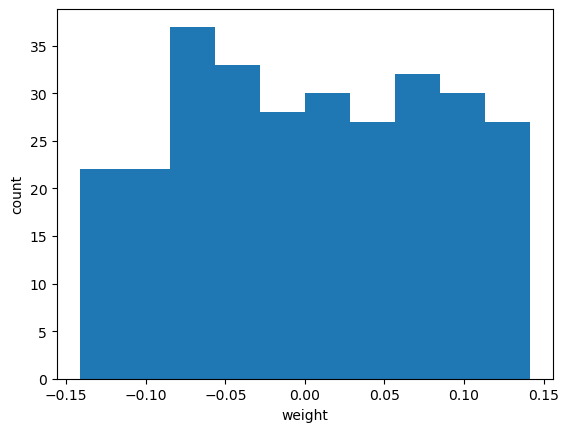

In [19]:
# 가중치 배열 히스토그램으로 표현
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

- 텐서플로가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택해서 비교적 고른 분포를 보임

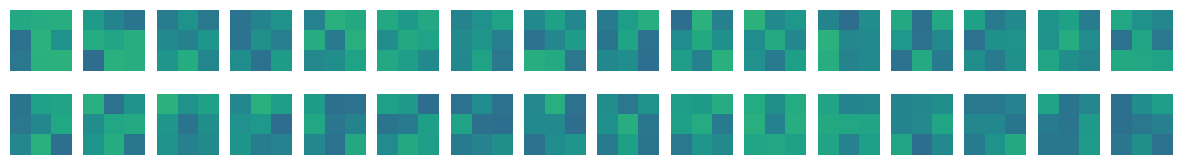

In [46]:
# 이 가중치 값을 맷플롯립의 imshow() 함수를 사용해 이전처럼 그림으로 출력
# 학습된 가중치와 비교하기 위해 동일하게 vmin과 vmax를 -0.5와 0.5로 설정
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
        axs[i, j].axis('off')
plt.show()

- 전체적으로 가중치가 밋밋하게 초기화됨

- 합성곱 신경망이 패션 MNIST 데이터셋의 분류 정확도를 높이기 위해 유용한 패턴을 학습했다

### 함수형 API

- 지금까지 신경망 모델을 만들 때 케라스 Sequential 클래스를 사용함

- 이 클래스는 층을 차례대로 쌓은 모델을 만든다
- 더 복잡한 모델에서는 Sequential 모델을 사용하기 어려움

함수형 API(functional API)
- 케라스의 Model 클래스를 사용하여 모델을 만든다

Dense 층 2개로 이루어진 완전 연결 신경망을 함수형 API로 구현

In [47]:
# 1. 2개의 Dense 층 객체 만들기
dense1 = keras.layers.Dense(100, activation = 'sigmoid')
dense2 = keras.layers.Dense(10, activation = 'softmax')

- 이 객체를 Sequential 클래스 객체의 add() 메서드에 전달할 수 있다

- 함수처럼 호출할 수도 있음! > hidden = dense1(input)

- 두 번째 층 호출

- 첫 번쨰 층의 출력을 입력으로 사용 > outputs = dense2(hidden)

- 그 다음 inputs와 outputs를 Model 클래스로 연결 > model = keras.Model(inputs, outputs)

- 케라스는 InputLayer 클래스 객체를 쉽게 다룰 수 있도록 Input() 함수를 별도로 제공

- 입력의 크기를 지정하는 shape 매개변수와 함께 이 함수를 호출하면 InputLayer 클래스 객체를 만들어 출력을 반환 > inputs = keras.Input(shape=(784,))

- model 객체의 predict() 메서드를 호출하면 입력부터 마지막 층까지 모든 계산을 수행한 후 최종 출력을 반환

- 케라스 모델은 input 속성으로 입력을 참조할 수 있다 > model.input으로 이 모델의 입력을 간단히 얻을 수 있음
- print(model.input)

In [ ]:
print(model.inputs)

In [ ]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)

### 특성맵 시각화

In [ ]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

- predict() 메서드는 항상 입력의 첫 번째 차원이 배치 차원일 것으로 기대

- 하나의 샘플을 전달하더라고 꼭 첫 번째 차원을 유지해야 함

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)

- conv_acti.predict() 메서드가 출력한 feature_maps의 크기 확인

In [ ]:
print(feature_maps.shape)

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [ ]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [ ]:
# 첫 번째 샘플을 conv2_acti 모델의 predict() 메서드에 전달
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [ ]:
print(feature_maps.shape)

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()